# Coursera Capstone Project: Weeks 4 and 5

## Project Title: "The New Silicon Valley: Why Miami is the New Hotspot for Tech Innovation."

### Part 1: Introduction/Business Problem.  A description of the problem and a discussion of the background.

The results of the COVID-19 pandemic have put a major strain on businesses due to government policies, paired with a rising income tax rate, and high cost-of-living.  As a result many businesses are looking for alternative places to setup, or move to. This year we are seeing that many major key players in the tech industry are looking for alternative locations and local governments who support entrepreneurs and businesses to support the goals of the company. <p>

This is a major shift again in history (like the gold rush in the mid 1800's, and Silicon Valley in the early 1900s to today) now seeking less government restriction elsewhere for booming technical innovation, lower crime rate, and better living conditions.  Which could also bring in more people and money to the cities. <p>

For the Capstone Project I will be investigating why tech businesses are choosing to move to Miami versus staying in Silicon Valley, San Francisco Bay, CA.  and Why places like Miami, FL and Austin, TX are so attractive?

### Part 2: Data: A description of the data and how it will be used to solve the problem.

a.	The data collected will be the average cost of living for each location. <p>
b.	Income tax for each area. <p>
c.	Labor cost. <p>
d.  Business Incentives <p>

<h3> Supplementary Information/Factors to Consider: </h3><p>
    Environmental factors and attractions. <p>
	Local restaurants, housing areas, etc.<p>
	Crime rate statistics. <p>
   



<h3> Census Data </h3> <p>
    California Census Data: https://data.census.gov/cedsci/profile?g=0400000US06 Accessed on August 23 2021 <p>
    Florida Census Data: https://data.census.gov/cedsci/profile?g=0400000US12 Accessed on August 23 2021 <p>

# Import Libraries

In [ ]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
from bs4 import BeautifulSoup # webscraping and parser library
print('Libraries imported.')

# Setup and Background: Problem Shaping

We will comparing the locations of Santa Clara Valley, CA and Miami, FL <p>

Both cities offer great weather and close to the ocean.  However where they begin to differentiate is in the details. <p>

### Silicone Valley

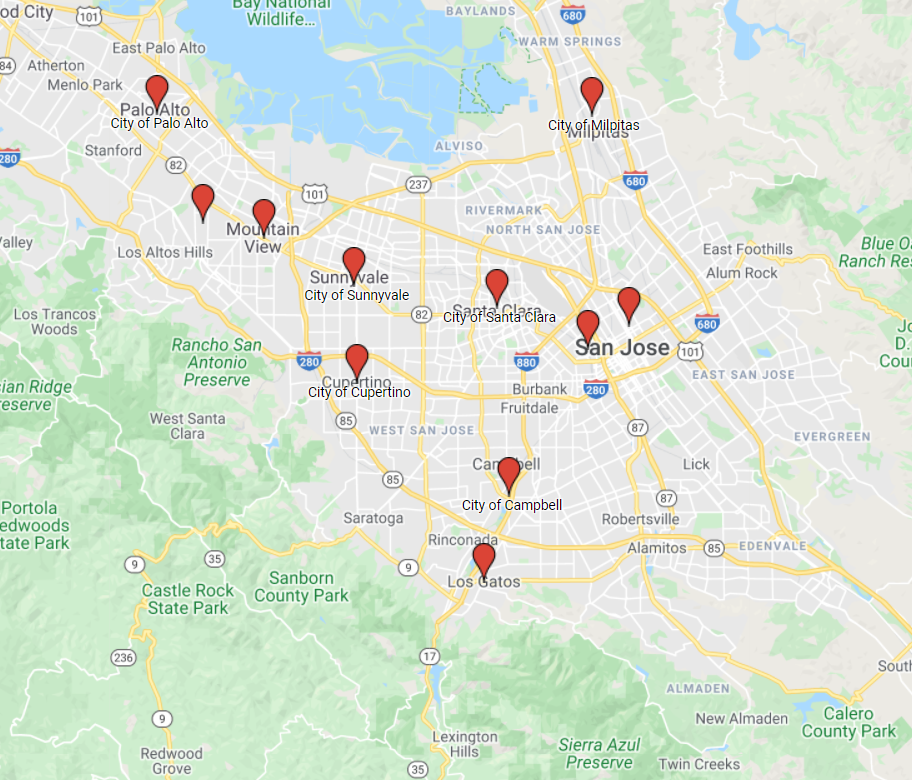
"Silicon Valley is a region in the southern part of the San Francisco Bay Area in Northern California that serves as a global center for high technology and innovation. It corresponds roughly to the geographical Santa Clara Valley." Information accessed from https://en.wikipedia.org/wiki/Silicon_Valley on August 23 2021. <p>
Zipcodes: https://www.unitedstateszipcodes.org/ on August 23 2021. <p>

### Miami-Dade County

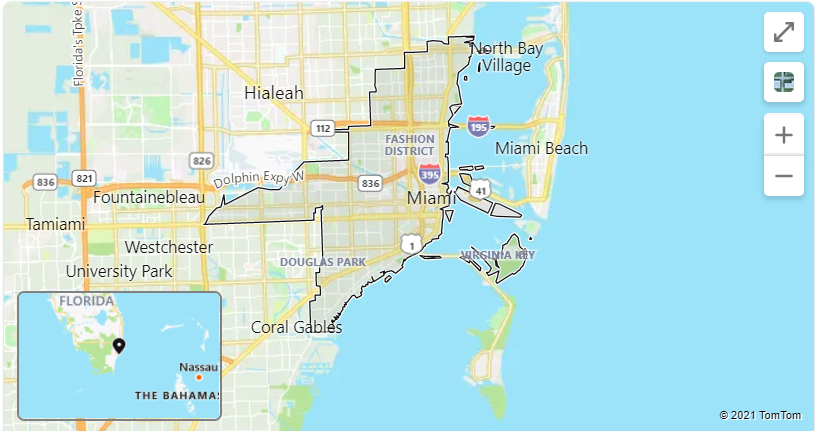
"Miami-Dade County is a county located in the southeastern part of the U.S. state of Florida. According to a 2019 census report,[6] the county had a population of 2,716,940,[7] making it the most populous county in Florida and the seventh-most populous county in the United States.[8] It is also Florida's third largest county in terms of land area, with 1,946 square miles (5,040 km2). The county seat is Miami, the principal city in South Florida.[9]" Information accessed from https://en.wikipedia.org/wiki/Miami-Dade_County,_Florida on August 23 2021. <p>
Miami Zipcodes: https://www.unitedstateszipcodes.org/ August 23 2021. <p>

### A. Cost of Living

Santa Clara, CA vs Miami, FL

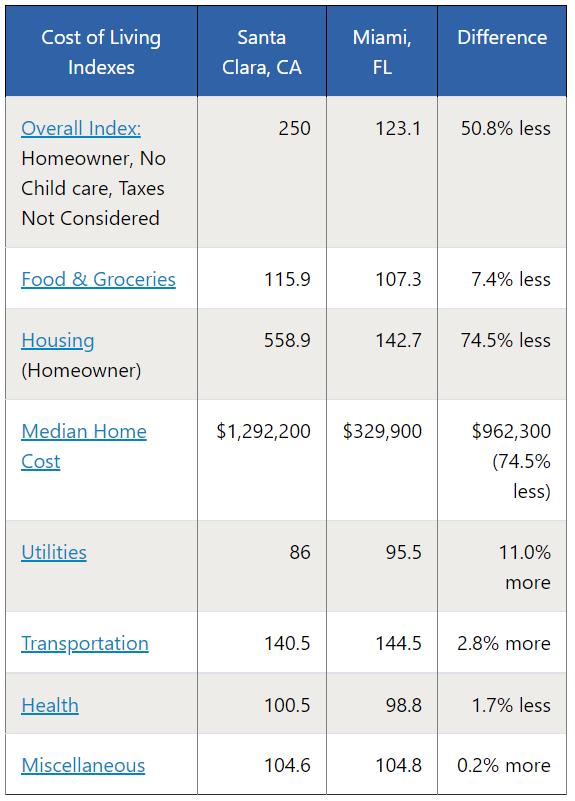
Information accessed from https://www.bestplaces.net/cost-of-living/santa-clara-ca/miami-fl/250000 on August 23 2021.

### B. Income Taxes and Other Taxes

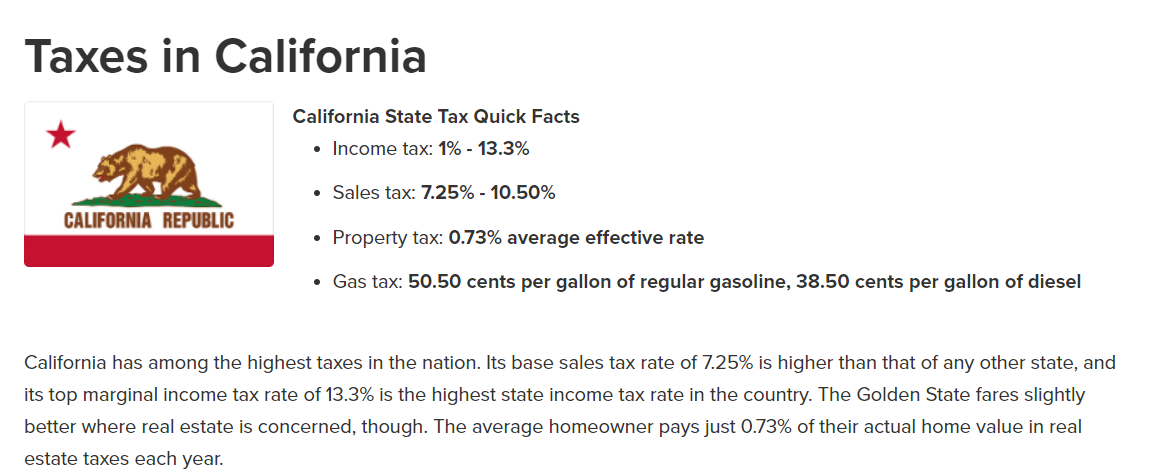
Information accessed from https://smartasset.com/taxes/california-tax-calculator on August 23 2021.

### Florida Taxes

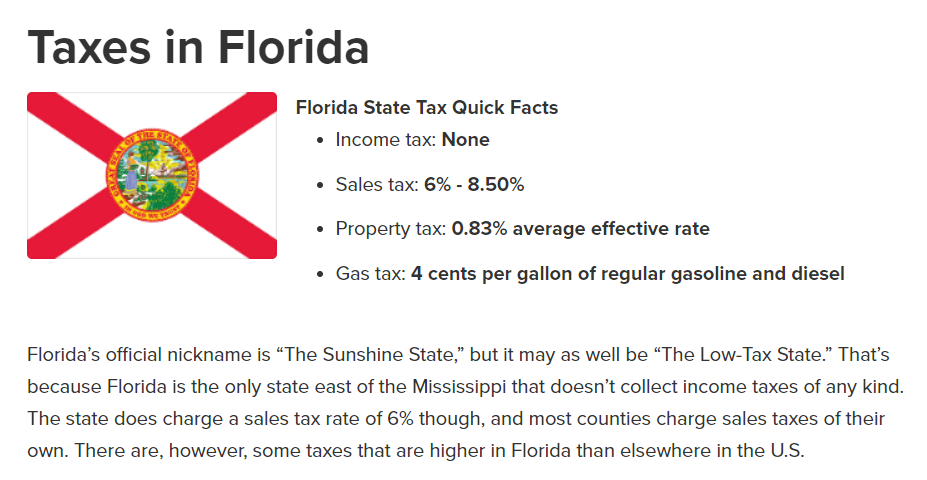
Information accesesed from https://smartasset.com/taxes/florida-tax-calculator on August 23 2021

### C. Occupational and Labor Statistics

*** Data set can be pulled from the links provided. Or from the GitHub account *** <p>
    CA: https://github.com/Goose0x/Coursera_Capstone/blob/master/stateCA_M2020_dl.xlsx <p>
    FL: https://github.com/Goose0x/Coursera_Capstone/blob/master/stateFL_M2020_dl.xlsx <p>
        
California: Information accessed from https://www.bls.gov/oes/current/oes_ca.htm#15-0000 on August 23 2021 <p>
Florida: Information accessed from https://www.bls.gov/oes/current/oes_fl.htm#15-0000 on August 23 2021 <p>


### D. Business Incentives

California Information: http://apps.csg.org/BusinessIncentives/StateProfile.aspx?id=5 Accessed on August 23 2021 <p>
Florida Information: http://apps.csg.org/BusinessIncentives/StateProfile.aspx?id=9 Accessed on August 23 2021 <p>

In [ ]:
# Sanfrancisco Bay Area: Alameda, Contra Costa, Marin, Napa, San Mateo, Santa Clara, Solano, Sonoma, and San Francisco

In [ ]:
# Using Requests and BeautifulSoup library to extract and format the data
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' # website containing the information to use
data  = requests.get(url).text # webscrape the data and format as text
soup = BeautifulSoup(data,"html5lib")  # create a soup object using the variable 'data' html doctype
# print(soup.prettify)  # displays the content in text document

In [ ]:
# find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>

In [ ]:
# number of tables found by checking the length of the tables list
len(tables)

In [ ]:
# Creating a data frame 'cell' which will break the data for Toronto into three columns.

cell = ['Postal Code', 'Borough', 'Neighborhood']

table_contents=[]
table=soup.find('table')
for row in table.findAll('td'): # locates a data cell within a table
    cell = {}
    if row.span.text=='Not assigned':  # skips over empty cells
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [ ]:
#DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
df = df.rename({'PostalCode': 'Postal Code'}, axis=1)
df.head(12) # Display first eleven rows.

In [ ]:
df.shape # Size (rows) in our data table.
'>>> Displays the shape of the dataframe'
df.shape
df.count()

### Geolocation Data

In [ ]:
# Information regarding Geo Locator ---> https://geocoder.readthedocs.io/index.html
!pip install geocoder
import geocoder # import geocoder

In [ ]:
#Run this for obtaining all the coordinates /sometimes GeoLocator is unreliable

import geocoder # import geocoder

initialize your variable to None
lat_lng_coords = None

loop until you get the coordinates
while(lat_lng_coords is None): g = geocoder.google('{}, Toronto, Ontario'.format(postal_code)) lat_lng_coords = g.latlng

latitude = lat_lng_coords[0] longitude = lat_lng_coords[1]

In [ ]:
# link to a csv file that has the geographical coordinates of each postal code:
postal = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv'
df1 = pd.read_csv(postal)
df1.sort_values(by=['Postal Code'])